## Exercício
Agora é hora de praticar. Para isso utilizaremos o dataset 'Forbes Highest Paid Athletes 1990-2020' que contém uma lista completa dos atletas mais bem pagos do mundo desde a primeira lista publicada pela Forbes em 1990. Em 2002 o período de relatório do ano civil foi alterado para de junho a junho e, consequentemente, não há registros de 2001.  
Usar https://www.kaggle.com/deepthimreddy/13-concusions-eda-on-highest-paid-dataset/notebook e https://www.kaggle.com/rushikeshdarge/forbes-highest-paid-athletes-eda

Importe a tabela **Forbes_Richest_Atheletes_1990_2020** que está em csv dentro do diretório **data**

In [2]:
forbes_atheletes = pd.read_csv('./data/Forbes_Richest_Atheletes_1990_2020.csv')

Verifique com a função .info os campos presentes na tabela

In [3]:
forbes_atheletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


Imprima as estatísticas padrões do dataframe com a função .describe

In [4]:
forbes_atheletes.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [17]:
forbes_atheletes.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


### Gráficos

1) Existem outliers nos valores de ganhos dos atletas

<AxesSubplot:>

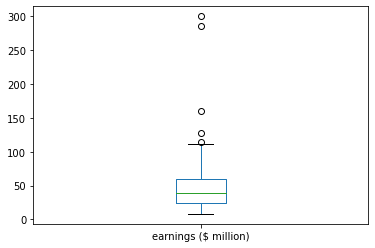

In [3]:
forbes_atheletes.plot(x='Year', y='earnings ($ million)', kind='box')

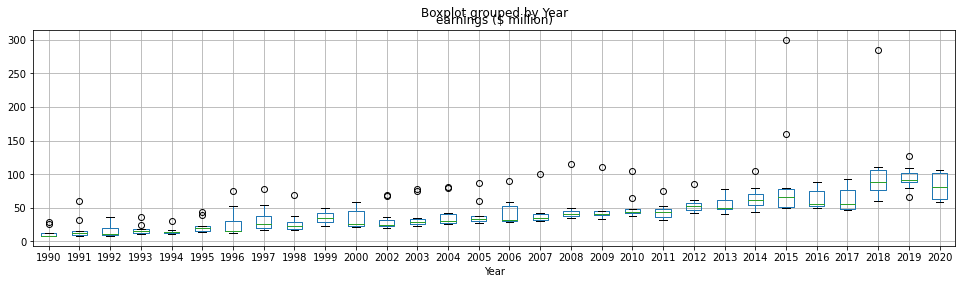

In [48]:
forbes_atheletes.boxplot(column='earnings ($ million)', by='Year', figsize=(16,4)); #vert=False

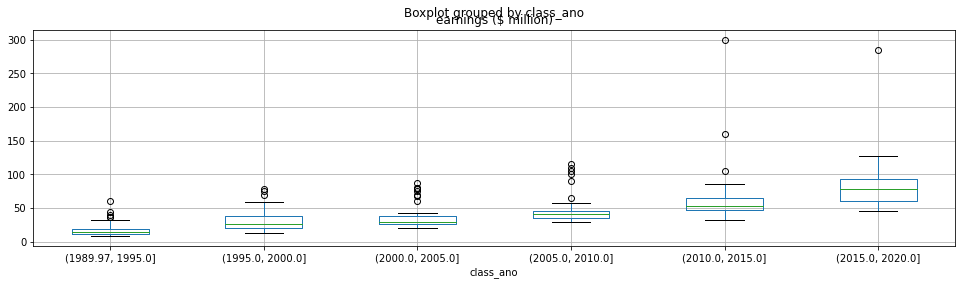

In [68]:
forbes_atheletes['class_ano'] = pd.cut(forbes_atheletes['Year'], bins=6)
forbes_atheletes.boxplot(column='earnings ($ million)', by='class_ano', figsize=(16,4));

2) Faça um gráfico de barras para verificar os ganhos (earnings) anuais dos atletas

In [25]:
forbes_atheletes.head(2)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0


<AxesSubplot:xlabel='Year'>

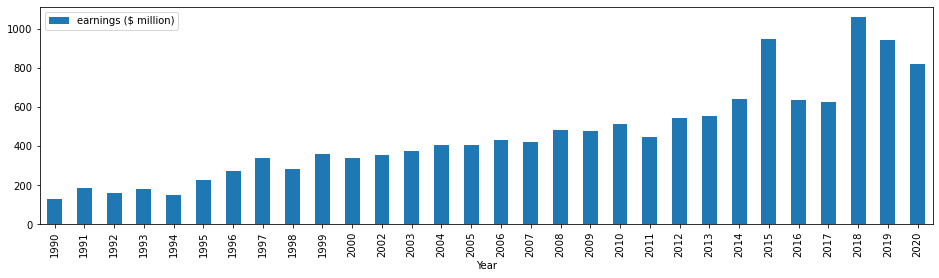

In [82]:
forbes_atheletes.groupby(['Year'])[['earnings ($ million)']].sum().plot(kind='bar', figsize=(16,4))

3) Quais são os dois atletas que mais aparecem nos registros do dataframe? Para estes atletas, como está a distribuição anual dos ganhos

In [8]:
forbes_atheletes.groupby('Name')[['S.NO']].count().sort_values(by='S.NO',ascending=False).head(2)

,S.NO
Name,
Michael Jordan,19
Tiger Woods,19


In [9]:
dois_mais = forbes_atheletes[(forbes_atheletes['Name'] == 'Michael Jordan' )|(forbes_atheletes['Name'] == 'Tiger Woods')]

In [10]:
dois_mais = dois_mais.groupby(['Name','Year'])[['earnings ($ million)']].sum()

In [11]:
dois_mais.reset_index(inplace=True)

In [12]:
dois_mais.head()

,Name,Year,earnings ($ million)
0,Michael Jordan,1990,8.1
1,Michael Jordan,1991,16.0
2,Michael Jordan,1992,35.9
3,Michael Jordan,1993,36.0
4,Michael Jordan,1994,30.0


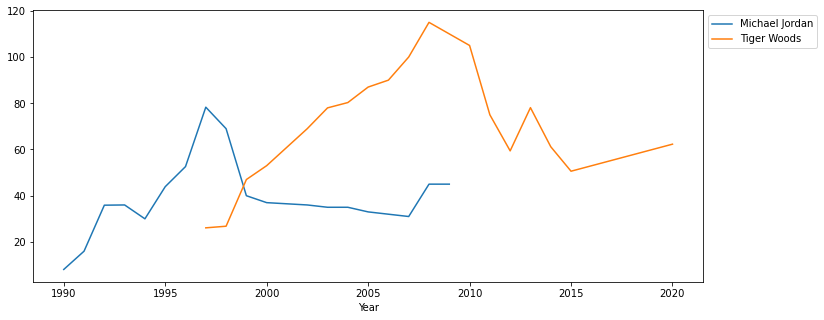

In [19]:
l1 = dois_mais[dois_mais['Name'] == 'Michael Jordan'].plot(x='Year', y='earnings ($ million)', kind='line', label='Michael Jordan')
l2 = dois_mais[dois_mais['Name'] == 'Tiger Woods'].plot(x='Year', y='earnings ($ million)', kind='line', label='Tiger Woods' ,ax=l1, figsize=(12,5))
plt.legend(loc = 2, bbox_to_anchor = (1,1));

4) Construa um gráfico de **barras horizontais** com os top 15 atletas em **média** de ganhos

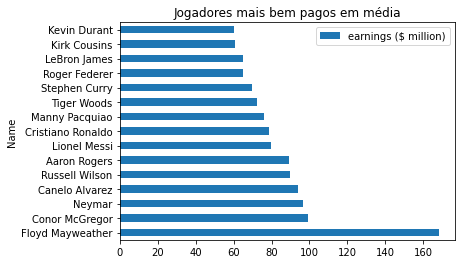

In [18]:
media_ganhos = forbes_atheletes.pivot_table(index='Name', values='earnings ($ million)', aggfunc='mean')
media_ganhos.sort_values(by='earnings ($ million)', ascending=False).head(15).plot(kind='barh',title = 'Jogadores mais bem pagos em média');

5) Gráfico de pizza as contagens dos países

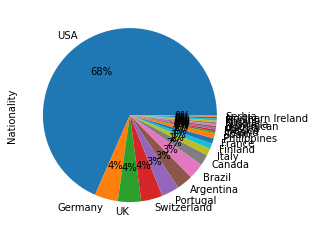

In [19]:
forbes_atheletes['Nationality'].value_counts().plot(kind='pie', autopct='%1.0f%%');

6) Dado o gráfico produzido acima construa um gráfico apenas com os países que obtiveram maior quantidade de atletas representados (USA, UK, Germany, Switzerland, Portugal) dos ganhos acumulados por país em função do tempo. Utilize um gráfico de linhas.

In [23]:
paises = ['USA', 'UK', 'Germany', 'Switzerland', 'Portugal']
paises_ano = forbes_atheletes[ forbes_atheletes['Nationality'].isin(paises) ]

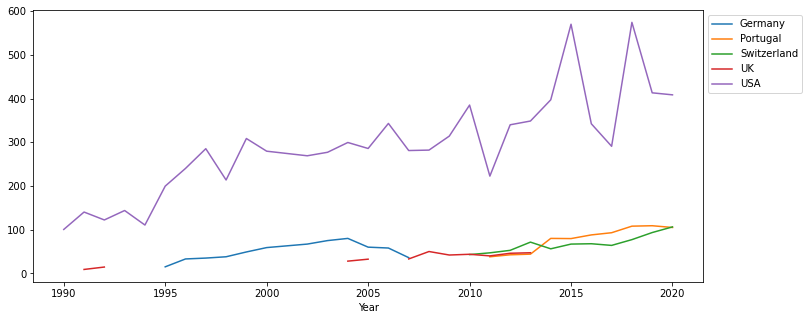

In [35]:
paises_ano.pivot_table(index='Year', columns='Nationality', values='earnings ($ million)', aggfunc=sum).plot(figsize=(12,5))
plt.legend(loc = 2, bbox_to_anchor = (1,1));

7) Faça um gráfico de pizza para verificar qual esporte mais aparece nestas listas

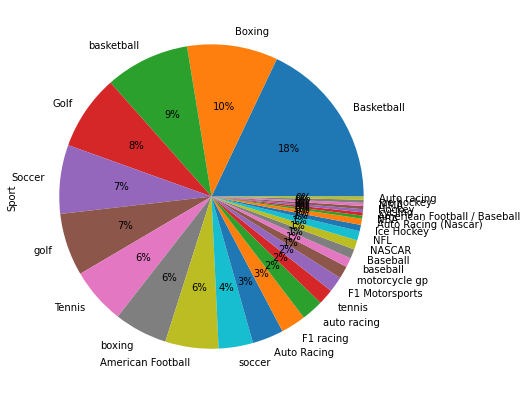

In [36]:
forbes_atheletes['Sport'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(12,7));

Alguns valores apresentam o mesmo nome, mas escritos com diferença de maiusculas ou minusculas, ou com o nome da liga ao invés de sua categoria, necessário realizar um tratamento nesses dados

8) Construa dois gráfico de barras para verificar os ganhos por esporte, sendo o primeiro dos ganhos médios e o segundo da somatória.

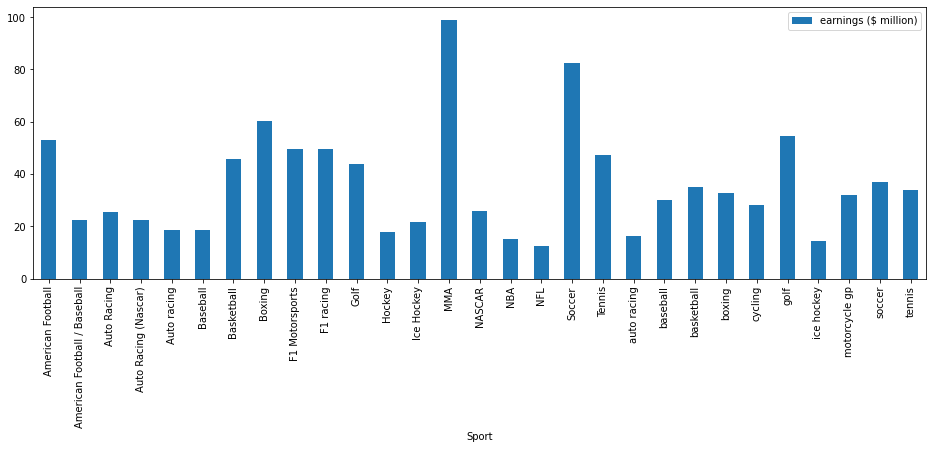

In [71]:
forbes_atheletes.pivot_table(index='Sport', values='earnings ($ million)', aggfunc='mean').plot(kind='bar', figsize=(16,5));

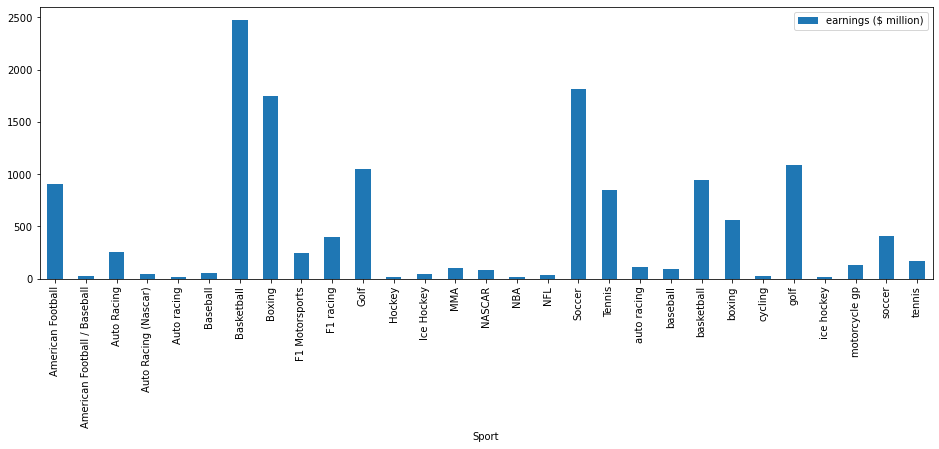

In [70]:
forbes_atheletes.pivot_table(index='Sport', values='earnings ($ million)', aggfunc='sum').plot(kind='bar', figsize=(16,5));